https://machinelearningmastery.com/semi-supervised-learning-with-label-spreading/

https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html

https://blockgeni.com/understanding-semi-supervised-learning-with-label-spreading/

https://aicorespot.io/semi-supervised-learning-with-label-spreading/

# Import Library

In [1]:
# Load, explore and plot data
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# %matplotlib inline
# Train test split
from sklearn.model_selection import train_test_split
# Text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

# Modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding, Dropout, GlobalAveragePooling1D, Flatten, SpatialDropout1D, Bidirectional
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.semi_supervised import LabelSpreading
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import joblib

2024-09-21 18:56:05.379054: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Import Notebook

In [2]:
# %run notebook_functions.ipynb
%run notebook_model_ls.ipynb
%run notebook_model_lstm_.ipynb


# ASRS

In [4]:
options={
    "is_merge_taxonomy": True
}

# Train

The DataFrame is None
sample_size= (10000, 5)
                      HFACS_Category_Value  Count
0                Organizational Influences    739
1    Preconditions/Conditions of Operators    291
2          Preconditions/Personnel Factors    232
3       Preconditions/Physical Environment    790
4  Preconditions/Technological Environment   3078
5                                 Unmapped    748
6                              Unsafe acts   4122
Shape of label tensor: (9701,)
5 [4 4 0 ... 6 6 6]
Accuracy on test data: 0.9956780118854673


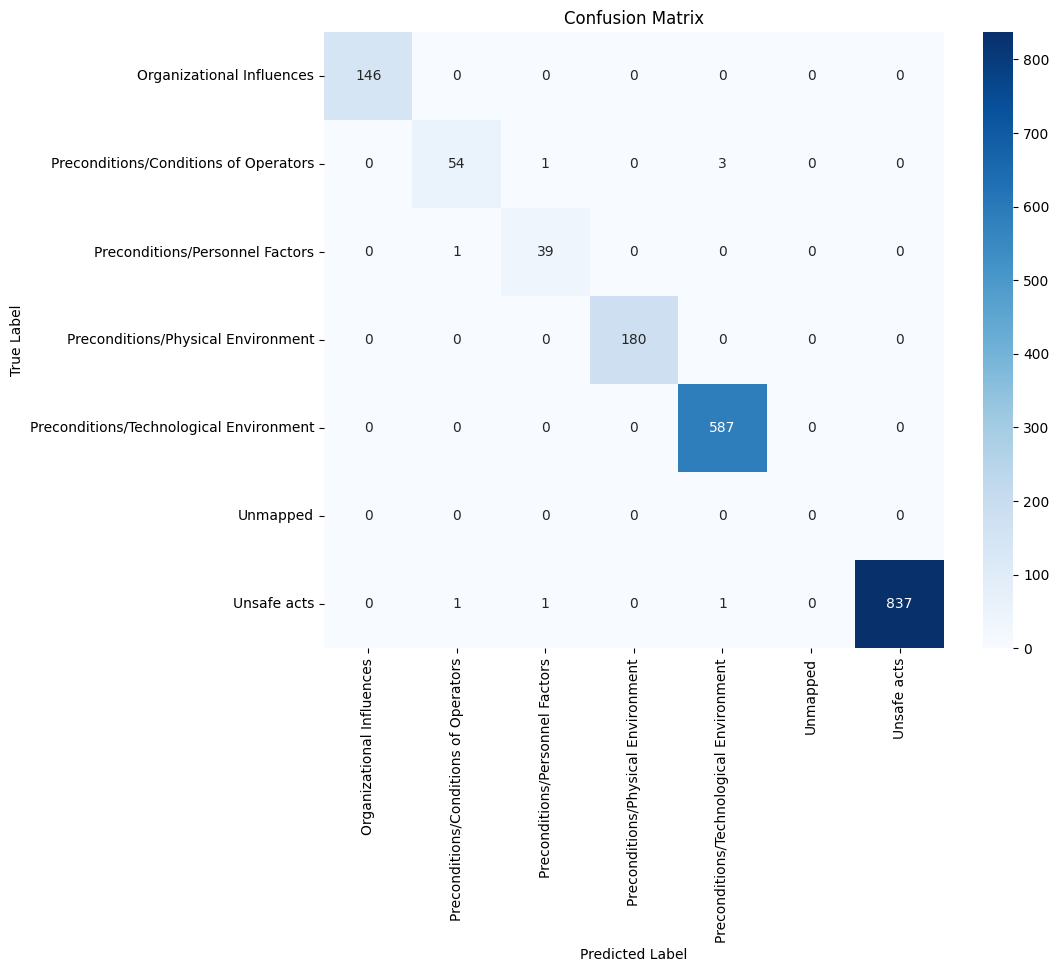

asrs Model and vectorizer saved successfully


In [118]:
# 01. Get Data
asrs_df = CoreUtils.get_data('asrs')

options={
    "is_merge_taxonomy": True
}

# 02. Label Spreading
asrs_modelLS = ModelLS(None, 'asrs', 10000, options=options)
asrs_modelLS.train()

# 03. Apply it new data get predicting label
# asrs_predicted_data = ModelLS.predict(asrs_df, 'asrs', 1, 25000)

# model_data = labeled_data[labeled_data['HFACS_Category_Value_Predict'] != 'Unmapped'].copy()

# 05. Show Label distribution
# show_label(asrs_predicted_data, 'HFACS_Category_Value_Predict')
# asrs_predicted_data

In [30]:
asrs_predicted_data = ModelLS.predict(asrs_df, 'asrs', 3, 25000)

Model and vectorizer loaded successfully


In [3]:
asrs_lstm_Model = LSTMModel(None, ds_name='asrs', sample_size=500)
asrs_lstm_Model.train()
asrs_lstm_Model.evaluate()
# lstm_Model.
# lstm_Model.tra

The DataFrame is None
['asrs']
Data loaded
start labelling


AttributeError: 'dict' object has no attribute 'split'

# NTSB

The DataFrame is None
sample_size= (10000, 5)
                      HFACS_Category_Value  Count
0                Organizational Influences      7
1    Preconditions/Conditions of Operators    352
2          Preconditions/Personnel Factors     59
3       Preconditions/Physical Environment    386
4  Preconditions/Technological Environment    614
5                                 Unmapped   5830
6                              Unsafe acts   2752
Shape of label tensor: (7934,)
5 [ 6  3 -1 ... -1 -1 -1]
Accuracy on test data: 1.0


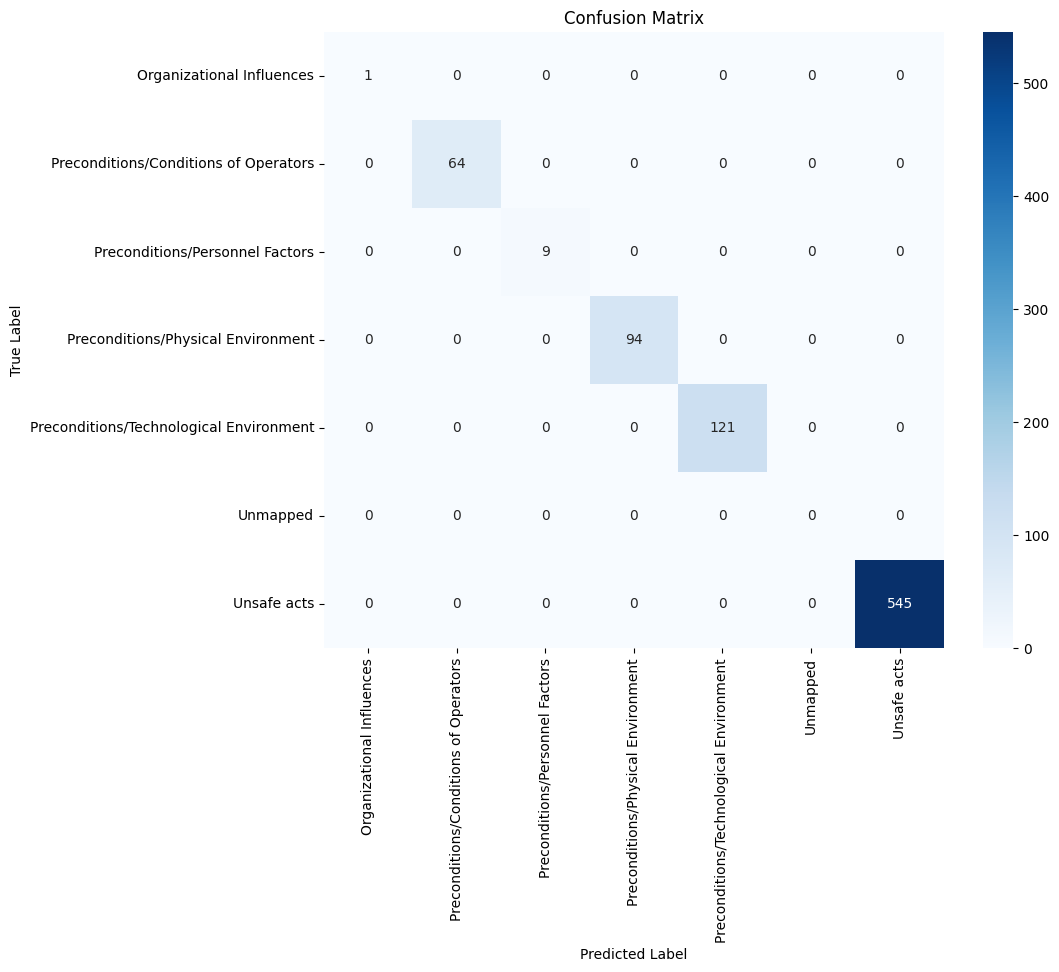

ntsb Model and vectorizer saved successfully


In [119]:
# 01. Get Data
ntsb_df = CoreUtils.get_data('ntsb')

ntsb_modelLS = ModelLS(None, 'ntsb', 10000, options=options)
ntsb_modelLS.train()

# 04. Apply it new data get predicting label
# ntsb_predicted_data = ntsb_modelLS.predict(ntsb_df, 25000)

# model_data = labeled_data[labeled_data['HFACS_Category_Value_Predict'] != 'Unmapped'].copy()

# 05. Show Lablel distribution
# show_label(ntsb_predicted_data, 'HFACS_Category_Value_Predict')
# ntsb_predicted_data.to_csv('data_ntsb_sample_with_label.csv')
# ntsb_predicted_data

In [59]:
ntsb_lstm_Model = LSTMModel(ds_name='ntsb', sample_size=5000)
ntsb_lstm_Model.train()
ntsb_lstm_Model.evaluate()

['ntsb']
Data loaded
start labelling
sample_size= (500, 4)
           HFACS_Category_Value  Count
0          Adverse Mental State     17
1   Adverse Physiological State      1
2               Decision Errors     47
3        Organizational Process      4
4             Perceptual Errors      3
5            Personal Readiness      2
6          Physical Environment     36
7          Physical Limitations      1
8            Skill-based Errors     93
9     Technological Environment     36
10                     Unmapped    260
Shape of label tensor: (430,)
Model and vectorizer loaded successfully
Sampling size (3813, 5)
start pre_process_df
combined_narrative
counting_narrative
clean_narrative
clean_feature
drop_narratives
preprocess_narrative


/var/folders/__/wffwy8dx6l53rqlg01sth6th0000gn/T/ipykernel_53874/2983950930.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=[feature_name], inplace=True)


event_id                        0
finding_description             0
HFACS_Category_Value_Predict    0
narrative                       0
narrative_length                0
narrative_word_count            0
narrative_sentence_count        0
dtype: int64
             event_id                                finding_description  \
66723  20220711105438  Not determined-Not determined-(general)-(gener...   
66724  20220711105439  Aircraft-Aircraft power plant-Engine (turbine/...   
66725  20220711105439  Aircraft-Aircraft oper/perf/capability-Perform...   
66726  20220711105439  Aircraft-Aircraft oper/perf/capability-Perform...   
66727  20220711105439  Environmental issues-Physical environment-Terr...   

      HFACS_Category_Value_Predict  \
66723              Decision Errors   
66724    Technological Environment   
66725    Technological Environment   
66726    Technological Environment   
66727         Physical Environment   

                                               narrative  narra

/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_modules/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 18s 207ms/step - accuracy: 0.2231 - loss: 2.4116 - val_accuracy: 0.4947 - val_loss: 2.3913
Epoch 2/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - accuracy: 0.4348 - loss: 2.3861 - val_accuracy: 0.4947 - val_loss: 2.3356
Epoch 3/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 283ms/step - accuracy: 0.4570 - loss: 2.3010 - val_accuracy: 0.4947 - val_loss: 1.9476
Epoch 4/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 283ms/step - accuracy: 0.4931 - loss: 1.8505 - val_accuracy: 0.4947 - val_loss: 1.5530
Epoch 5/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 259ms/step - accuracy: 0.4723 - loss: 1.6506 - val_accuracy: 0.4947 - val_loss: 1.5029
Epoch 6/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.4744 - loss: 1.5609 - val_accuracy: 0.4947 - val_loss: 1.4961
Epoch 7/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 270ms/step - accuracy: 0.4650 - loss: 1.5915 - val_accuracy: 0.4947 - val_loss: 1.4963
Epoch 8/10
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 314ms/step - accuracy: 0.4925 - loss: 1.5427 - val_accuracy: 0.4947 - val

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step
Accuracy: 0.4000
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00        12
           9       0.00      0.00      0.00        30
          10       0.40      1.00      0.57        42

    accuracy                           0.40       105
   macro avg       0.06      0.14      0.08       105
weighted avg       0.16      0.40      0.23       105



/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_modules/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lasanthalakmal/Documents/Chester/Study/Programming/CO7100_Research_Dissertation/AviationSafetyAnalysisModel/python_module

# ASRS & NTSB (Combination)

The DataFrame is None
sample_size= (10000, 5)
                      HFACS_Category_Value  Count
0                Organizational Influences    739
1    Preconditions/Conditions of Operators    291
2          Preconditions/Personnel Factors    232
3       Preconditions/Physical Environment    790
4  Preconditions/Technological Environment   3078
5                                 Unmapped    748
6                              Unsafe acts   4122
sample_size= (10000, 5)
                      HFACS_Category_Value  Count
0                Organizational Influences      7
1    Preconditions/Conditions of Operators    352
2          Preconditions/Personnel Factors     59
3       Preconditions/Physical Environment    386
4  Preconditions/Technological Environment    614
5                                 Unmapped   5830
6                              Unsafe acts   2752
Shape of label tensor: (17635,)
5 [ 4  4  0 ... -1 -1 -1]
Accuracy on test data: 0.9966480446927374


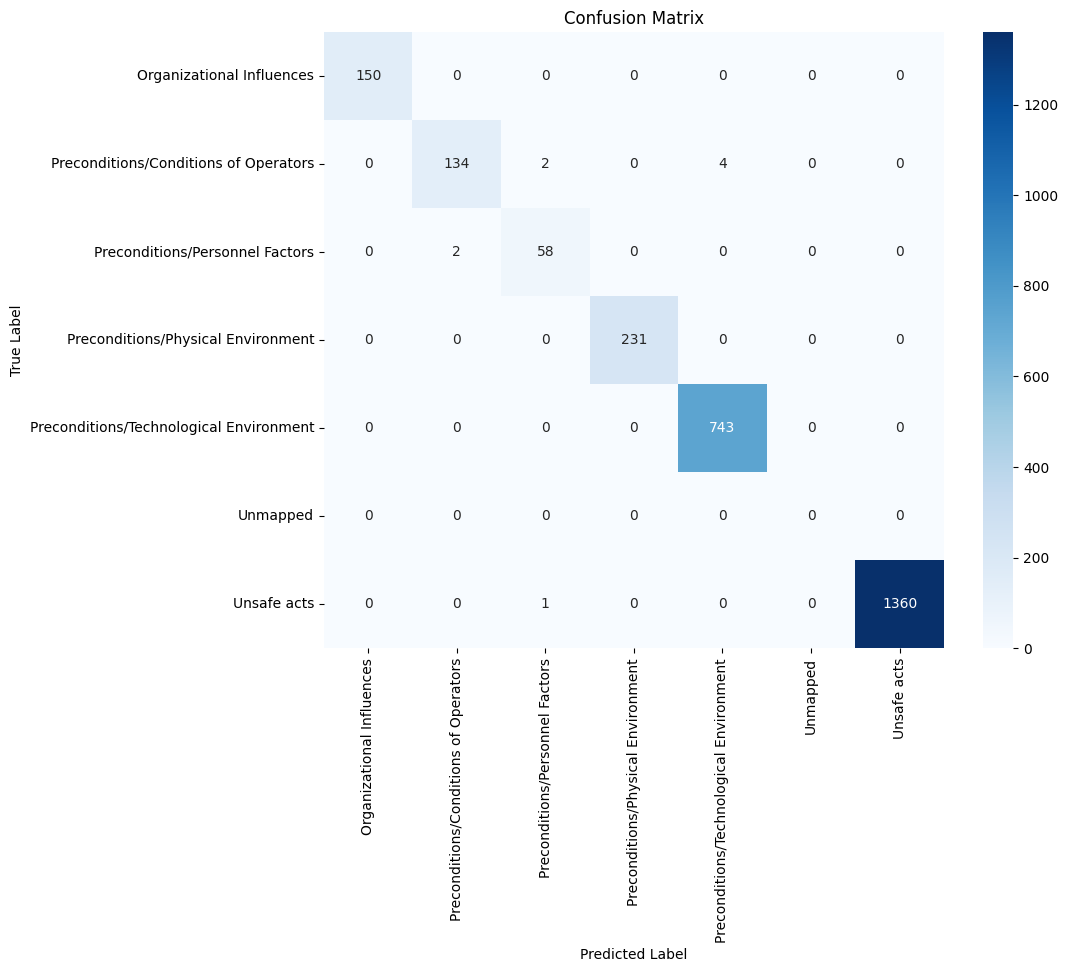

asrs_ntsb Model and vectorizer saved successfully


In [5]:
# 01. Manual Labeling with specific sample
asrs_ntsb_modelLS = ModelLS(None, 'asrs_ntsb', 10000, options=options)
asrs_ntsb_modelLS.train()


# asrs_df_tail = asrs_df.tail(15000)
# ntsb_df_tail = ntsb_df.tail(15000)
# asrs_ntsb_df_tail = pd.concat([asrs_df_tail, ntsb_df_tail], axis=0).reset_index(drop=True)
# asrs_ntsb_df_tail.isnull().sum()

# 04. Apply it new data get predicting label
# ntsb_predicted_data = predict_LS(asrs_ntsb_df_tail, 'asrs_ntsb')
# asrs_ntsb_predicted_data = ModelLS.predict(asrs_ntsb_df_tail)

# # model_data = labeled_data[labeled_data['HFACS_Category_Value_Predict'] != 'Unmapped'].copy()

# 05. Show Lablel distribution
# show_label(ntsb_predicted_data, 'HFACS_Category_Value_Predict')
# # ntsb_predicted_data.to_csv('data_ntsb_sample_with_label.csv')
# asrs_ntsb_predicted_data

In [121]:
asrs_ntsb_lstm_Model = LSTMModel(None, 'asrs_ntsb', ls_version=2, sample_size=1000)
asrs_ntsb_lstm_Model.train()
asrs_ntsb_lstm_Model.evaluate()

The DataFrame is None


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x131724fe0>
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/weakref.py", line 369, in remove
KeyboardInterrupt: 
